In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
df.dropna()
df.head()
#Se usara el siguiente dataaset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
print(df.groupby('target').size())

target
0    138
1    165
dtype: int64


In [5]:
x = np.array(df[["chol","thalach"]])
y = np.array(df['target'])
X = np.array(list(zip(x,y)))

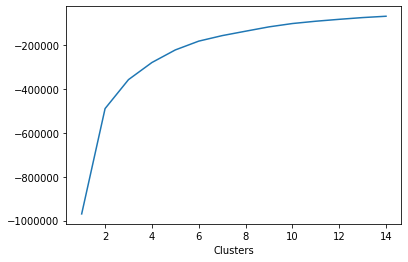

In [7]:
#Con la siguiente curva determinaremos el numero de clusters
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Clusters')
plt.show()

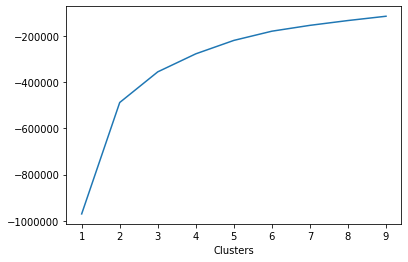

In [8]:
#Podemos ver que aun no es muy visible K
#asi que reduciremos el rango
#Con la siguiente curva determinaremos el numero de clusters
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Clusters')
plt.show()

In [9]:
#Se tiene uyn mayot estabilidad apartir del  3
kmeans = KMeans(n_clusters=3).fit(x)
labels = kmeans.predict(x)

centroids = kmeans.cluster_centers_
print(centroids)

[[197.47272727 150.95454545]
 [326.66037736 150.69811321]
 [254.16428571 148.22142857]]


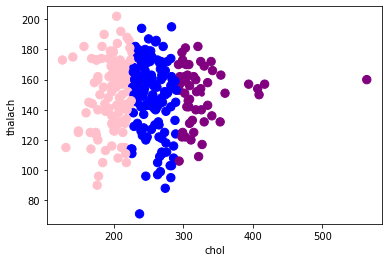

In [10]:

colores=['pink','purple','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
f1 = df['chol'].values
f2 = df['thalach'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='.', c=colores, s=100)
plt.xlabel("chol");
plt.ylabel("thalach");
plt.show()